In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('./Nutrient Composition Dataset.csv')

data.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [3]:
df = data.copy()

In [4]:
df.describe()

,S.No,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000
mean,873.500000,0.922470,0.900091,0.900146,0.900830
std,504.171102,0.627128,0.634617,0.623847,0.626875
min,1.000000,0.000128,0.000267,0.000029,0.002579
25%,437.250000,0.435853,0.394784,0.419103,0.389124
50%,873.500000,0.813025,0.804687,0.796290,0.820783
75%,1309.750000,1.295106,1.298988,1.280870,1.295732
max,1746.000000,4.016890,3.979364,4.013322,3.570331


<Axes: xlabel='Fat'>

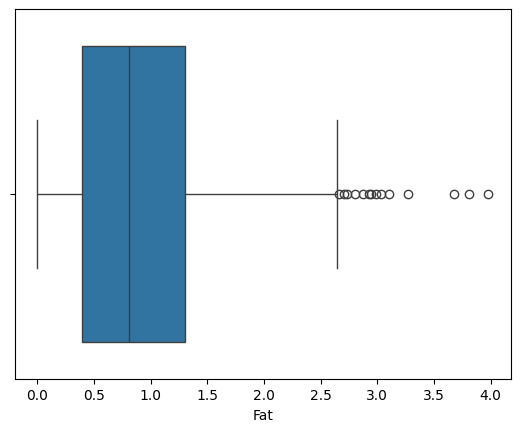

In [7]:
sns.boxplot(data=df, x='Fat')

<Axes: >

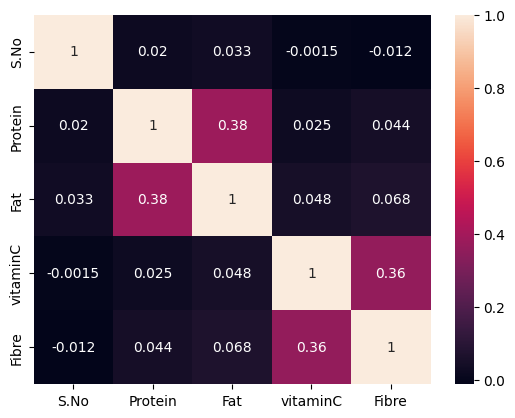

In [9]:
num_cols = df.select_dtypes(include=np.number).columns
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [10]:
import warnings

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.metrics import silhouette_score


from scipy.stats import zscore

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [11]:
df.drop('S.No', axis=1, inplace=True)

In [35]:
df.describe()

,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000
mean,0.922470,0.900091,0.900146,0.900830
std,0.627128,0.634617,0.623847,0.626875
min,0.000128,0.000267,0.000029,0.002579
25%,0.435853,0.394784,0.419103,0.389124
50%,0.813025,0.804687,0.796290,0.820783
75%,1.295106,1.298988,1.280870,1.295732
max,4.016890,3.979364,4.013322,3.570331


In [37]:
nutrition_attr = df.iloc[:, :-1]
nutrition_attr.head()
nutrition_attr_scaled = nutrition_attr.apply(zscore)
nutrition_attr_scaled.head()
 

,Protein,Fat,vitaminC,Fibre
0,-0.749825,0.426892,0.287212,1.279936
1,2.230835,-0.304578,-0.881972,-0.387079
2,-0.060478,0.451551,2.450659,1.729280
3,-0.330121,-0.508314,-1.008903,-0.848201
4,-1.259850,-0.560451,-1.255896,-0.548145


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

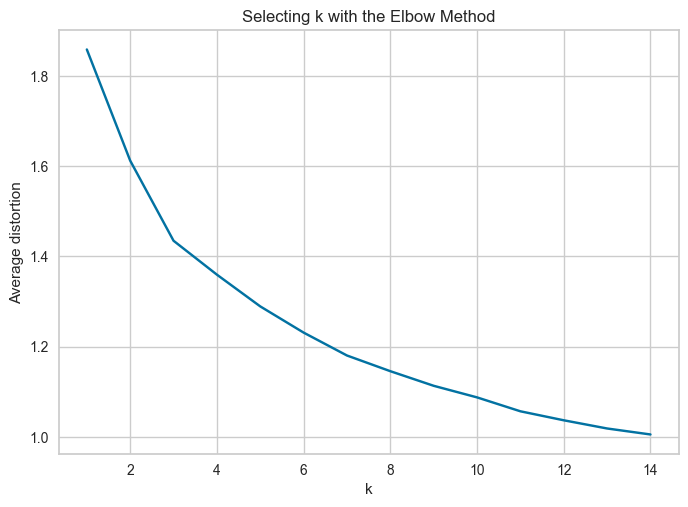

In [32]:
from scipy.spatial.distance import cdist
clusters=range(1,15)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k, random_state=1)
    model.fit(nutrition_attr_scaled)
    prediction=model.predict(nutrition_attr_scaled)
    meanDistortions.append(sum(np.min(cdist(nutrition_attr_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / nutrition_attr_scaled.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, silhouette score is 0.2546865628425197)
For n_clusters = 3, silhouette score is 0.25279484269416264)


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4, silhouette score is 0.20413010479269264)
For n_clusters = 5, silhouette score is 0.1961207025738027)
For n_clusters = 6, silhouette score is 0.20729558523850605)
For n_clusters = 7, silhouette score is 0.20845253012681747)


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8, silhouette score is 0.20920682766976723)
For n_clusters = 9, silhouette score is 0.2110083196894974)


c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


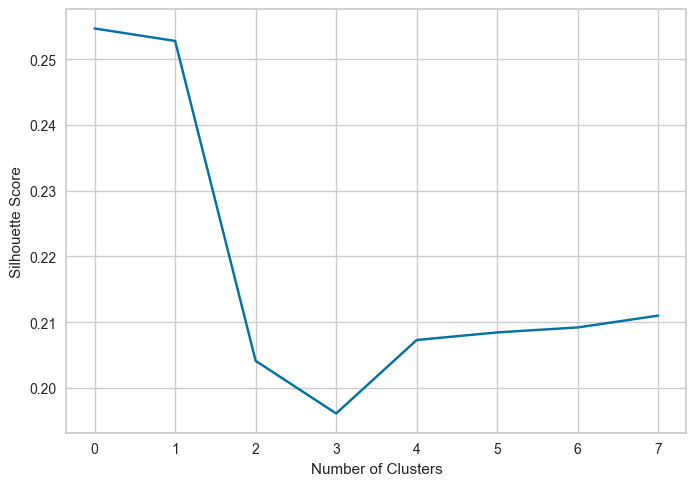

In [43]:
# calculate silhouette score
from cycler import K
from sklearn.metrics import silhouette_score
silhouette_scores = []
for n_cluster in range(2, 10):
    Kmeans = KMeans(n_clusters=n_cluster)
    preds = Kmeans.fit_predict(nutrition_attr_scaled)
    score = silhouette_score(nutrition_attr_scaled, preds)
    silhouette_scores.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_cluster, score))

# plot the silhouette scores
plt.plot(silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [44]:
# find silhouette coefficient for each sample
from sklearn.metrics import silhouette_samples
silhouette_values = silhouette_samples(nutrition_attr_scaled, preds)
silhouette_values

array([0.21591917, 0.26318441, 0.31572571, ..., 0.18890981, 0.050493  ,
       0.18886094])

In [50]:
final_model = KMeans(n_clusters=3, random_state=1)
final_model.fit(nutrition_attr_scaled)
prediction = final_model.predict(nutrition_attr_scaled)

df["GROUP"] = prediction

c:\Users\sethanga\AppData\Local\anaconda3\envs\Learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='GROUP', ylabel='count'>

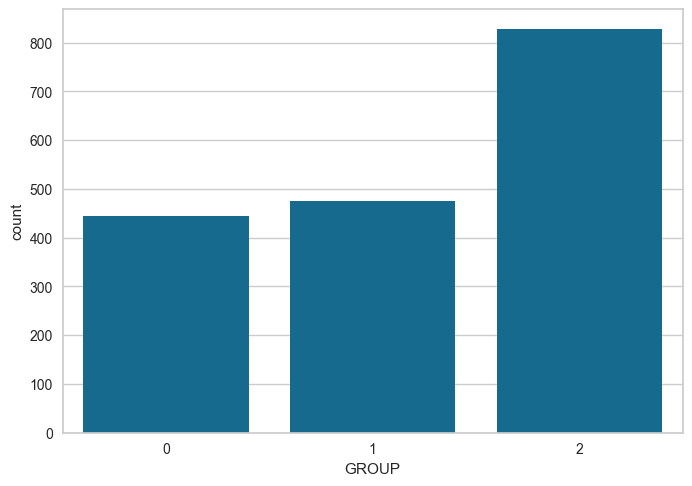

In [53]:
sns.countplot(x=df['GROUP'])